<a href="https://colab.research.google.com/github/Ashan-KS/ML_CW/blob/main/2330974_20221031_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Corpus Preparation**

## **1.1 Imports**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTENC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## **1.2 Fine tuning to Dataset's logic**

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

In [ ]:
# Identifying duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Removing duplicates
df = df.drop_duplicates()
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 12
Number of duplicate rows: 0


In [ ]:
# Replacing the 999 in pdays with -1
df['pdays'] = df['pdays'].replace(999, -1)

# Dropping the duration feature as recommended
df = df.drop('duration', axis=1)
# df = df.drop('pdays', axis=1)

# Fix: Set `previous` to 0 where `pdays == -1` and `previous != 0`
df.loc[(df['pdays'] == -1) & (df['previous'] != 0), 'previous'] = 0

In [ ]:
# Identifying duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Removing duplicates
df = df.drop_duplicates()
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1777
Number of duplicate rows: 0


## **1.3 Features Overview**

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
# Shape and head of the dataset
print("Dataset shape: ",df.shape,"\n")
df.head()

Dataset shape:  (39399, 20) 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Statistics of all numerical columns
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39399.000000,39399.000000,39399.000000,39399.000000,39399.000000,39399.000000,39399.000000,39399.000000,39399.000000
mean,40.116805,2.618924,-0.730374,0.063834,0.064314,93.577587,-40.499462,3.601570,5166.001284
std,10.460122,2.814909,1.543099,0.368104,1.576975,0.583772,4.643907,1.742203,72.754055
min,17.000000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,-1.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


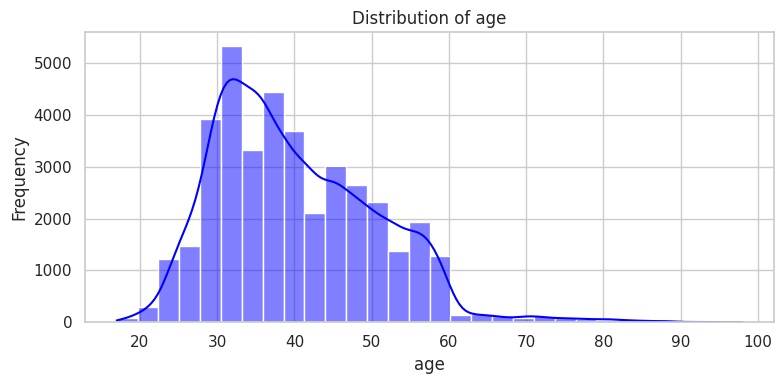

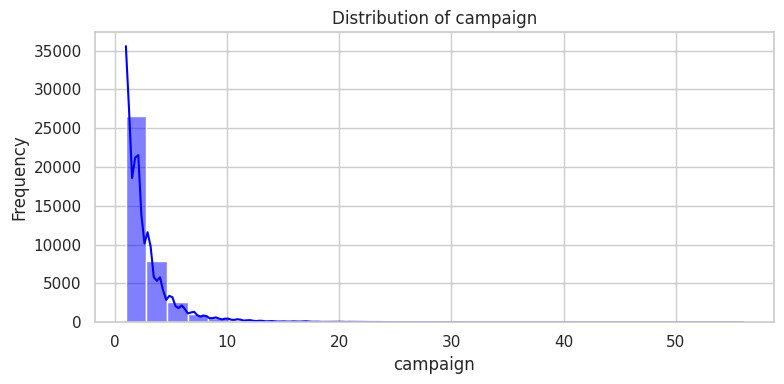

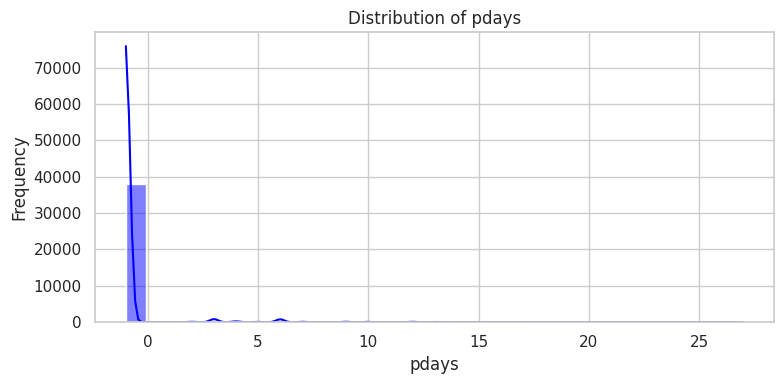

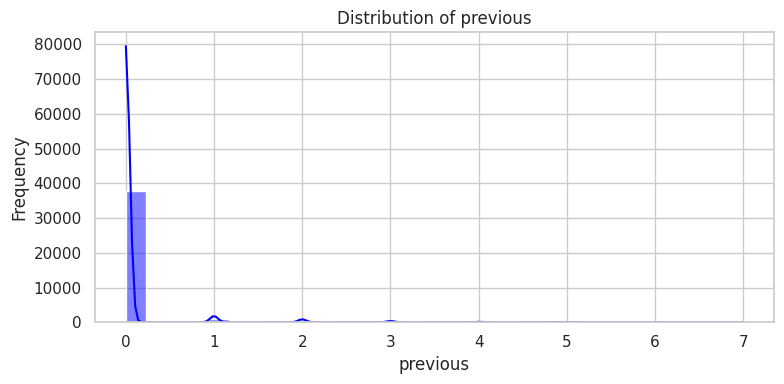

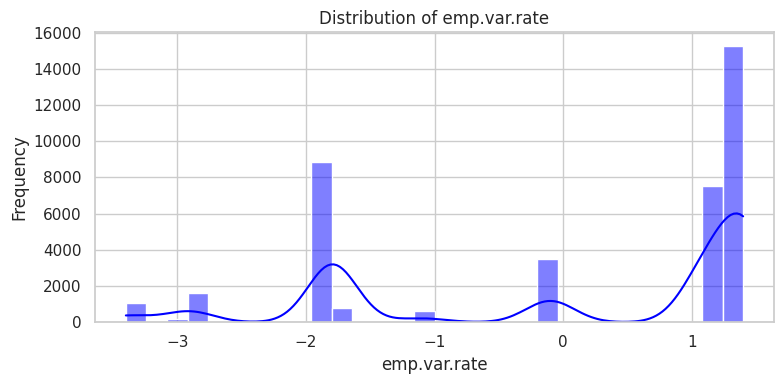

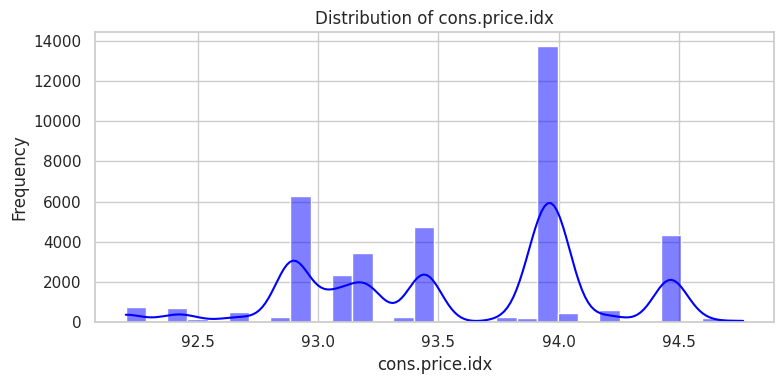

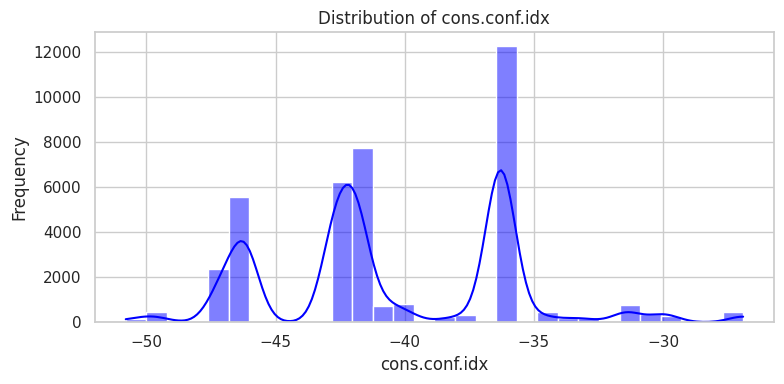

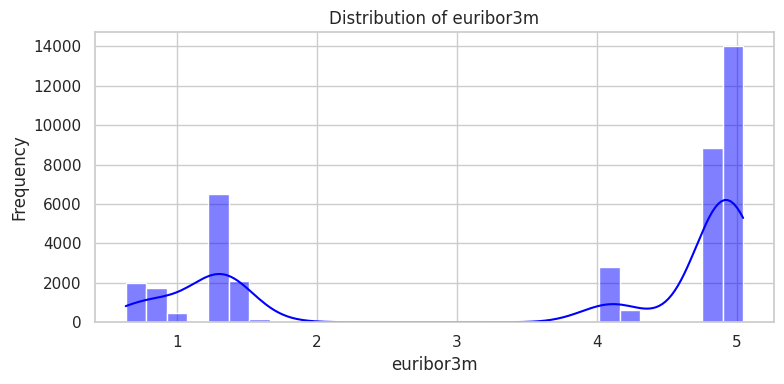

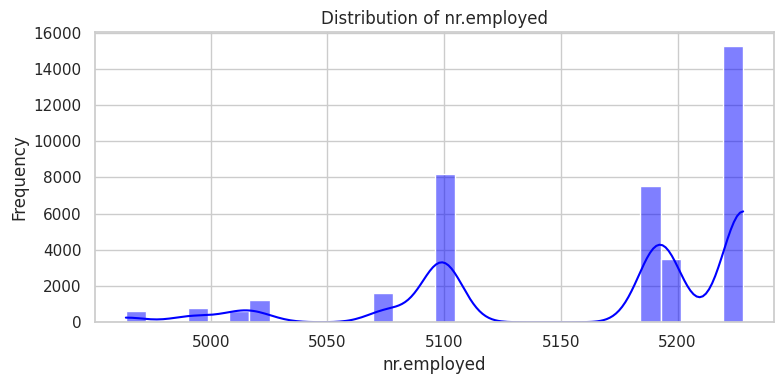

In [ ]:
# Set general style for plots
sns.set(style="whitegrid")

# Step 1: Loop through columns in the dataset
for column in numerical_cols:
    plt.figure(figsize=(8, 4))

    # Plot distribution for numeric column
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    # else:
    #     # Plot count plot for categorical column
    #     sns.countplot(x=df[column], palette='viridis')
    #     plt.title(f'Distribution of {column}')
    #     plt.xlabel(column)
    #     plt.ylabel('Count')
    #     plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

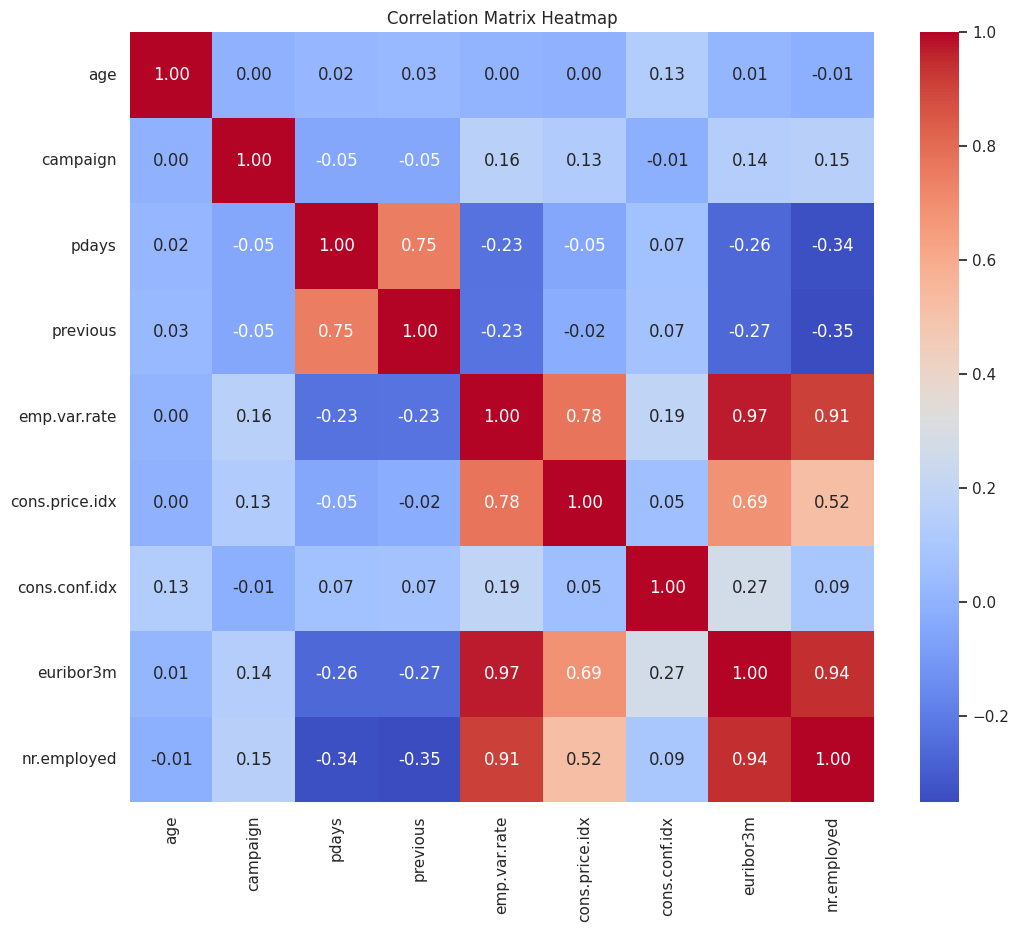

In [ ]:
# Now compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df = df.drop('emp.var.rate', axis=1)
df = df.drop('nr.employed', axis=1)

In [ ]:
# Print unique values for each categorical column
for column in categorical_cols:
    print('Column:', column)
    print(df[column].unique())
    print()

Column: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Column: marital
['married' 'single' 'divorced' 'unknown']

Column: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Column: default
['no' 'unknown' 'yes']

Column: housing
['no' 'yes' 'unknown']

Column: loan
['no' 'yes' 'unknown']

Column: contact
['telephone' 'cellular']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Column: day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

Column: poutcome
['nonexistent' 'failure' 'success']

Column: y
['no' 'yes']



<ipython-input-114-1b5b424cf012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


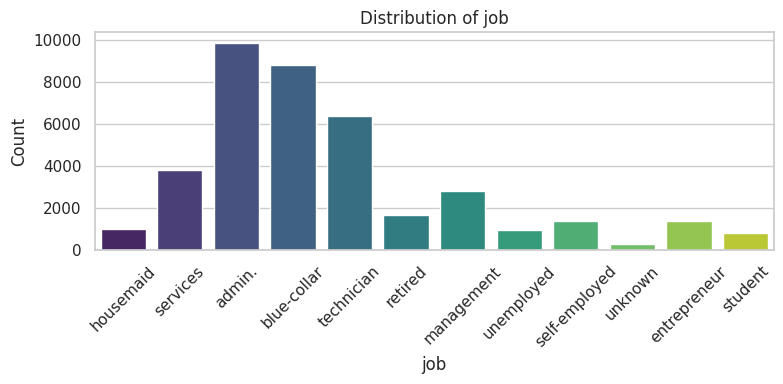

<ipython-input-114-1b5b424cf012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


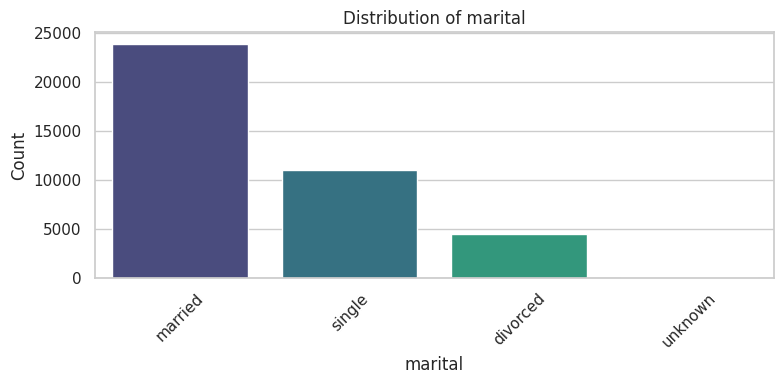

<ipython-input-114-1b5b424cf012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


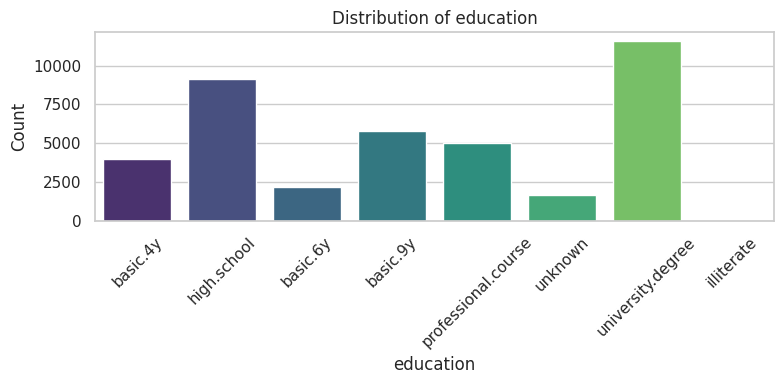

<ipython-input-114-1b5b424cf012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


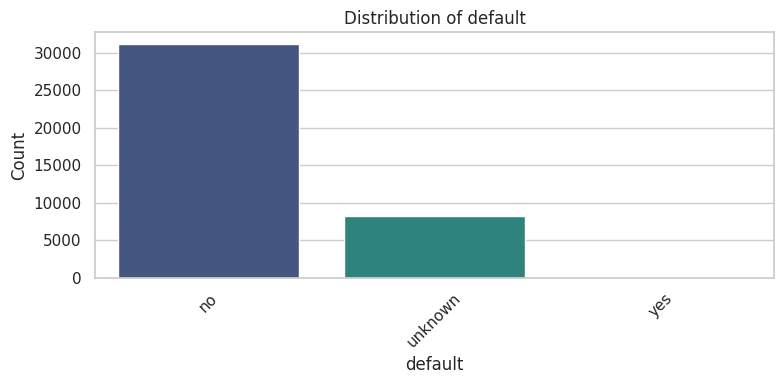

<ipython-input-114-1b5b424cf012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


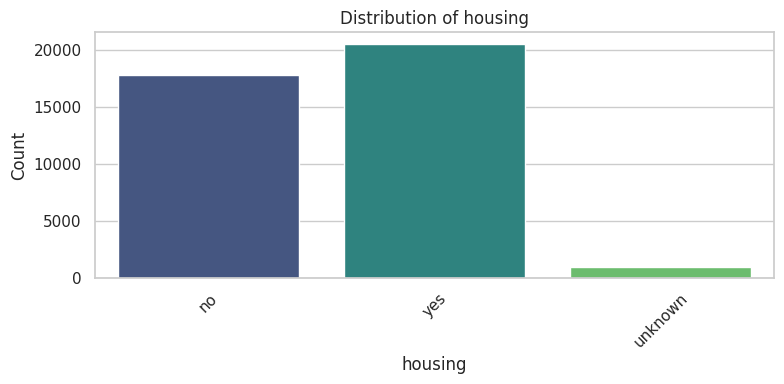

<ipython-input-114-1b5b424cf012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


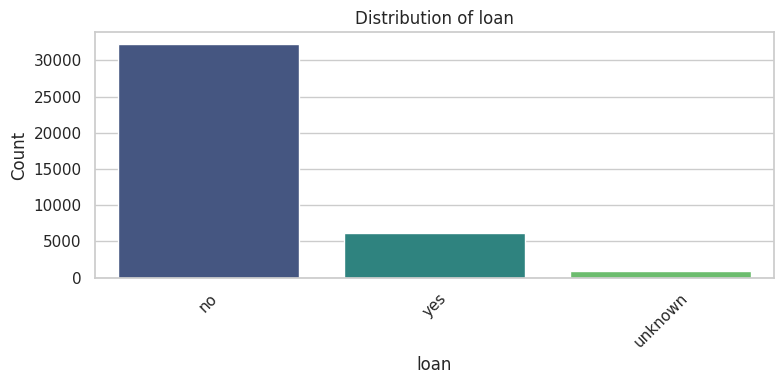

<ipython-input-114-1b5b424cf012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


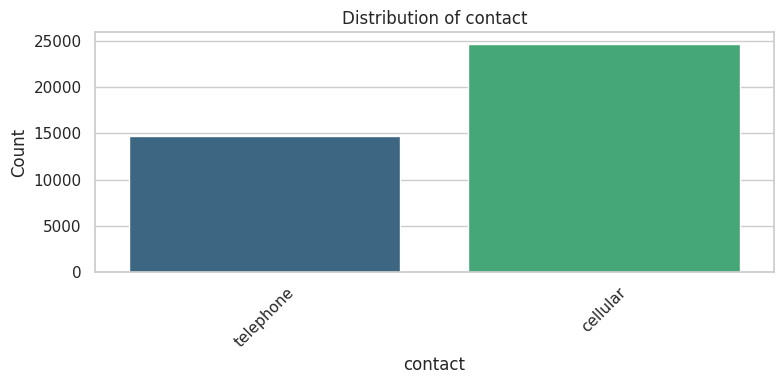

<ipython-input-114-1b5b424cf012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


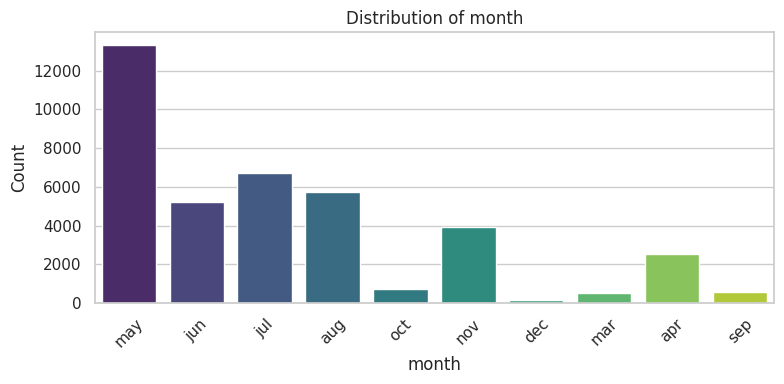

<ipython-input-114-1b5b424cf012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


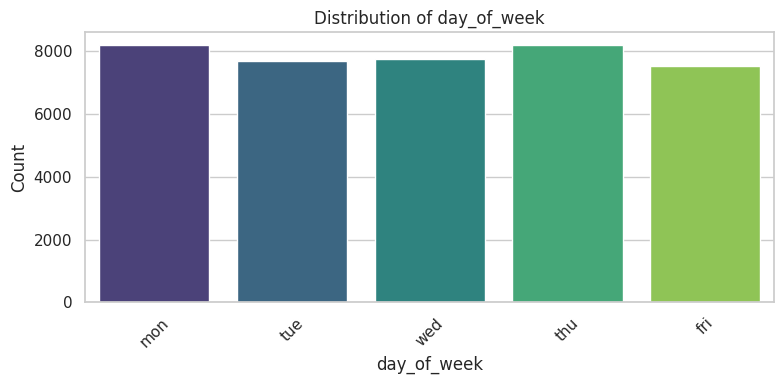

<ipython-input-114-1b5b424cf012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


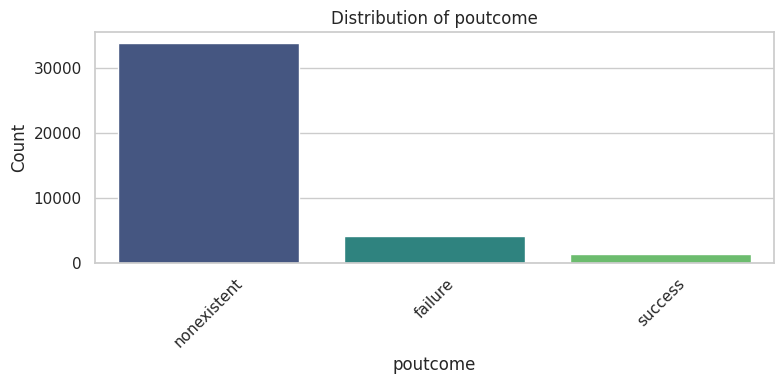

<ipython-input-114-1b5b424cf012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


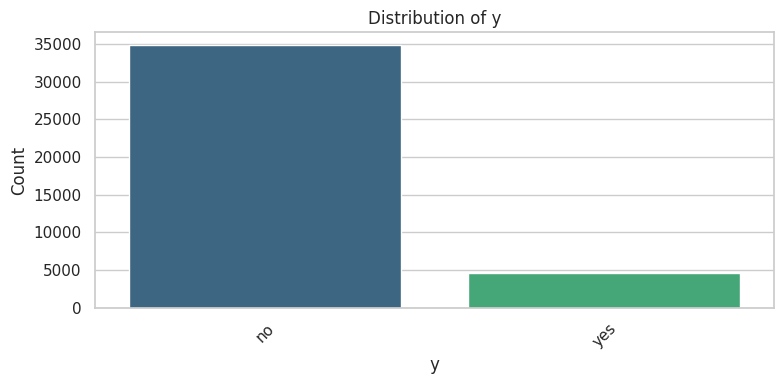

In [ ]:
# Set general style for plots
sns.set(style="whitegrid")

# Step 1: Loop through columns in the dataset
for column in categorical_cols:
    plt.figure(figsize=(8, 4))

    # Plot count plot for categorical column
    sns.countplot(x=df[column], palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
# Check the distribution of the target variable
target_distribution = df['y'].value_counts()

# Display the class imbalance
print("Class Distribution in Target Variable (y):")
print(target_distribution)

print("\nThe count of 'no' as the target variable is much greater than that of 'yes', therefore, fixing this class imbalance is crucial")

Class Distribution in Target Variable (y):
y
no     34801
yes     4598
Name: count, dtype: int64

The count of 'no' as the target variable is much greater than that of 'yes', therefore, fixing this class imbalance is crucial


## **1.4 Preprocessing**

### **1.4.1 Handling null values**

In [ ]:
# Checking for null values
print(df.isnull().sum())

print("\nThere are no null values in this dataset")

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
dtype: int64

There are no null values in this dataset


### **1.4.2 Splitting the dataset**

In [ ]:
# Extract features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
# Select numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Select categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

### **1.4.3 Handling the class imbalance of the training set**

In [ ]:
# Get categorical column indices
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

# Apply SMOTENC to handle imbalanced classes
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)

# Check the new distribution
balanced_distribution = pd.Series(y_train).value_counts()
print("\nClass Distribution After Applying SMOTE:")
print(balanced_distribution)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(



Class Distribution After Applying SMOTE:
y
0    27841
1    27841
Name: count, dtype: int64


In [ ]:
# # Identifying duplicates
# duplicates = X_train.duplicated().sum()
# print(f"Number of duplicate rows: {duplicates}")

# X = pd.concat([X_train, y_train], axis=1)

# # Removing duplicates
# X = X.drop_duplicates()
# duplicates = X.duplicated().sum()
# print(f"Number of duplicate rows: {duplicates}")

# X_train = X.drop('y', axis=1)
# y_train = X['y']

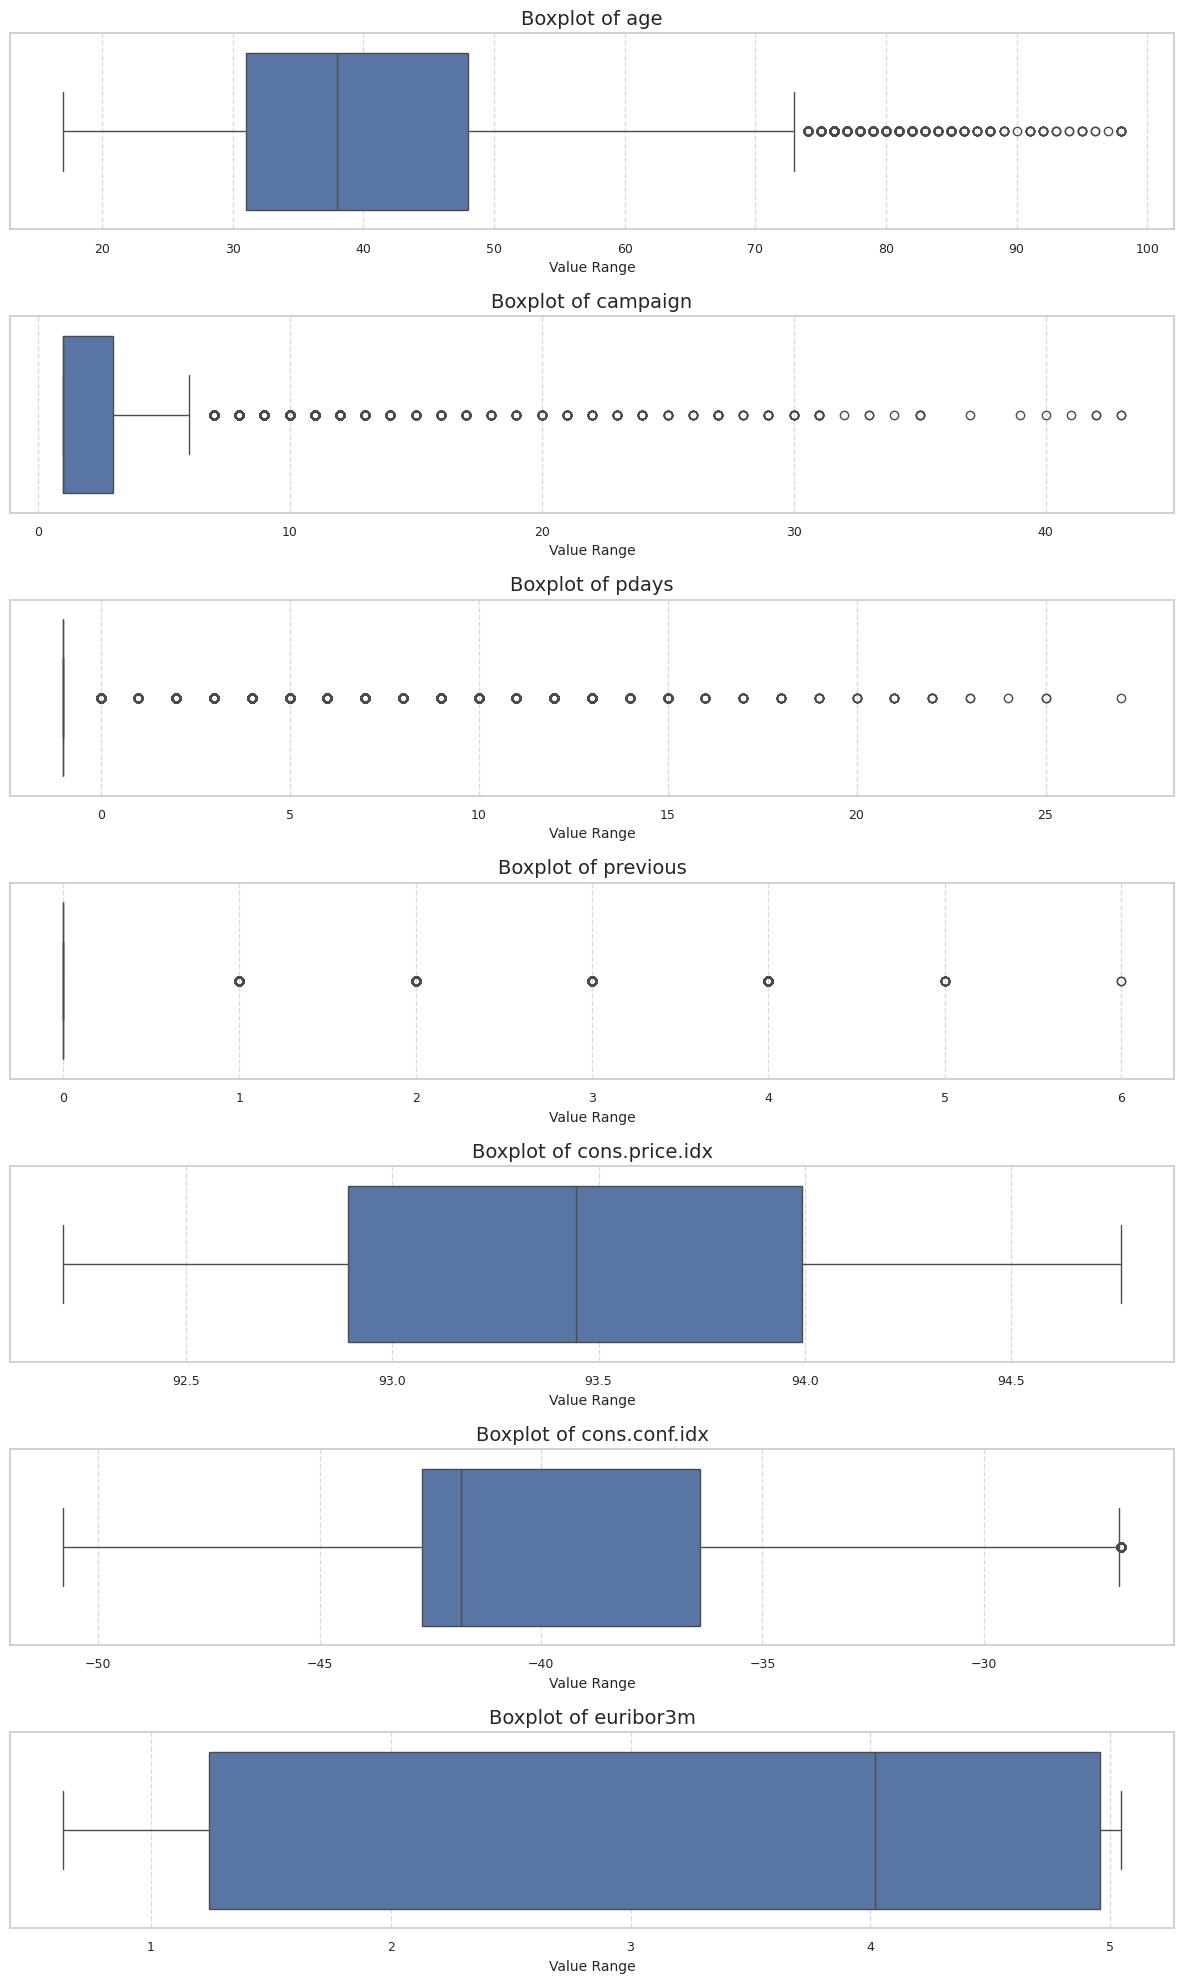


age: 992 outliers (1.78%)

campaign: 2342 outliers (4.21%)

pdays: 6201 outliers (11.14%)

previous: 6056 outliers (10.88%)

cons.price.idx: 0 outliers (0.00%)

cons.conf.idx: 1146 outliers (2.06%)

euribor3m: 0 outliers (0.00%)


In [ ]:
# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(12, 20), sharex=False)

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=X_train, x=col, ax=axes[i], orient="h")
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)
    axes[i].set_xlabel("Value Range", fontsize=10)
    axes[i].grid(axis="x", linestyle="--", alpha=0.7)
    axes[i].tick_params(axis="x", labelsize=9)
    axes[i].tick_params(axis="y", labelsize=9)

plt.tight_layout()
plt.show()

# Calculate outliers using IQR method
def get_outliers_count(X_train, column):
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)][column]
    return len(outliers)

# Print outlier counts
for col in numerical_cols:
    outlier_count = get_outliers_count(X_train, col)
    outlier_percentage = (outlier_count / len(X_train)) * 100
    print(f"\n{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")

In [ ]:
def cap_outliers(df, column, lower_limit=None, upper_limit=None):
    if lower_limit is not None and upper_limit is not None:
        df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

# Apply capping to specific columns
cap_outliers(X_train, 'age', upper_limit=90)      # Cap age at 90
cap_outliers(X_train, 'campaign', upper_limit=10)  # Cap campaign at 10
cap_outliers(X_train, 'previous', upper_limit=3)   # Cap previous at 3

### **1.4.4 Scaling the training & testing sets**

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

if len(categorical_cols) > 0:
    # Separate categorical and numerical features
    X_train_categorical = X_train[categorical_cols]
    X_train_numerical = X_train.drop(columns=categorical_cols)

    X_test_categorical = X_test[categorical_cols]
    X_test_numerical = X_test.drop(columns=categorical_cols)

    # Scale only numerical features
    X_train_numerical = scaler.fit_transform(X_train_numerical)
    X_test_numerical = scaler.transform(X_test_numerical)

    # Convert scaled numerical features back to DataFrames with original column names
    X_train_numerical = pd.DataFrame(X_train_numerical, columns=X_train.drop(columns=categorical_cols).columns, index=X_train.index)
    X_test_numerical = pd.DataFrame(X_test_numerical, columns=X_test.drop(columns=categorical_cols).columns, index=X_test.index)

    # Combine the scaled numerical features with the categorical features (no scaling on categorical)
    X_train = pd.concat([X_train_numerical, X_train_categorical], axis=1)
    X_test = pd.concat([X_test_numerical, X_test_categorical], axis=1)
else:
    # If no categorical columns, just apply scaling to the entire dataset
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train.head()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,-1.026596,-0.099136,-0.307712,-0.306224,-0.633662,-1.294522,-0.780008,blue-collar,single,high.school,no,yes,no,cellular,apr,thu,failure
1,-0.109469,-0.523271,-0.307712,-0.306224,-2.023205,1.641662,-1.102709,admin.,married,university.degree,unknown,yes,no,cellular,aug,thu,failure
2,0.057281,-0.523271,-0.307712,-0.306224,-0.633662,-1.294522,-0.821271,blue-collar,married,basic.9y,unknown,no,yes,cellular,apr,fri,failure
3,-1.026596,-0.099136,-0.307712,-0.306224,-0.923018,-1.126206,-0.877347,blue-collar,married,basic.4y,no,no,no,cellular,may,mon,nonexistent
4,-0.359595,-0.099136,-0.307712,-0.306224,0.706595,-0.471643,1.060444,technician,divorced,professional.course,no,yes,no,cellular,jul,mon,nonexistent


### **1.4.5 Encoding the training & testing sets**

In [ ]:
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # Fit the encoder on the training data and transform it
    X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))

    # Transform the testing data using the same encoder
    X_test_encoded = encoder.transform(X_test[categorical_cols])
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

    # Combine encoded categorical features with numerical ones for both X_train and X_test
    X_train = pd.concat([X_train.drop(columns=categorical_cols).reset_index(drop=True), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(columns=categorical_cols).reset_index(drop=True), X_test_encoded], axis=1)
else:
    # If no categorical columns, just reset the index for both
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

X_train.head()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-1.026596,-0.099136,-0.307712,-0.306224,-0.633662,-1.294522,-0.780008,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.109469,-0.523271,-0.307712,-0.306224,-2.023205,1.641662,-1.102709,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.057281,-0.523271,-0.307712,-0.306224,-0.633662,-1.294522,-0.821271,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.026596,-0.099136,-0.307712,-0.306224,-0.923018,-1.126206,-0.877347,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.359595,-0.099136,-0.307712,-0.306224,0.706595,-0.471643,1.060444,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# **2. Implementation**

## **2.1 Random Forest Implementation**

In [ ]:
# Initialize Random Forest with class weight balancing
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # cv=5 means 5-fold cross-validation

In [ ]:
# # Define the model
# rf_model = RandomForestClassifier(random_state=42)

# # Define the hyperparameter grid
# param_distributions = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
#     'max_features': ['sqrt', 'log2', None]
# }

# # Apply Randomized Search
# random_search = RandomizedSearchCV(
#     estimator=rf_model,
#     param_distributions=param_distributions,
#     n_iter=20,  # Number of random combinations to try
#     cv=5,       # Cross-validation folds
#     scoring='roc_auc',
#     n_jobs=-1,
#     random_state=42,
#     verbose=2
# )

# # Fit the Randomized Search
# random_search.fit(X_train, y_train)

# # Best model evaluation
# best_model = random_search.best_estimator_

# y_pred = best_model.predict(X_test)
# y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# accuracy = accuracy_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_proba)

# print("Random Forest Classifier Results (After Randomized Search):")
# print("Best Parameters:", random_search.best_params_)
# print("Accuracy:", accuracy)
# print("ROC AUC Score:", roc_auc)
# print("Classification Report:")
# print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
# Print the cross-validation results
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of CV Scores: {np.std(cv_scores):.2f}")

Cross-Validation Scores: [0.78818353 0.92655114 0.92717313 0.92403017 0.92411997]
Mean CV Score: 0.90
Standard Deviation of CV Scores: 0.05


In [ ]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# ROC-AUC score (for binary classification)
if len(set(y_test)) == 2:  # Check if it's binary classification
    rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
    print(f"ROC-AUC Score: {rf_roc_auc:.2f}")
else:
    print("ROC-AUC is only applicable for binary classification.")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Random Forest Classifier Performance:
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6960
           1       0.43      0.48      0.45       920

    accuracy                           0.87      7880
   macro avg       0.68      0.70      0.69      7880
weighted avg       0.87      0.87      0.87      7880

ROC-AUC Score: 0.78

Confusion Matrix:
[[6385  575]
 [ 481  439]]


In [ ]:
# # Get feature importances
# feature_importances = rf_model.feature_importances_
# print(len(feature_importances))
# print(len(feature_names))

# # Create a DataFrame for better visualization
# importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# # Plot
# plt.figure(figsize=(20, 10))
# plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
# plt.gca().invert_yaxis()
# plt.title('Feature Importance')
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()

## **2.2 Nueral Network Implementation**

In [ ]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Print the number of components
print(f"Number of components selected: {pca.n_components_}")
print("Unique classes in y_train:", np.unique(y_train))

Number of components selected: 28
Unique classes in y_train: [0 1]


In [ ]:
# Build the Neural Network Model
nn_model = Sequential([
    # Input layer and first hidden layer
    Dense(512, input_dim=X_train.shape[1], activation='relu'),  # Increase neurons for better feature extraction
    BatchNormalization(),
    Dropout(0.4),  # Slightly higher dropout to reduce overfitting

    # Second hidden layer
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Third hidden layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Fourth hidden layer
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Fifth hidden layer
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Output layer
    Dense(1, activation='sigmoid')  # For binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# Summary of the model
nn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 512)                 │          14,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193,409 (755.50 KB)

 Trainable params: 191,425 (747.75 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', # or 'val_accuracy'
                               patience=10,          # Number of epochs to wait for improvement
                               restore_best_weights=True, # Restore the model to the best weights
                               verbose=1)

# Compute class weights for y_train
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),  # Automatically handles unique class labels in y_train
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Train the model
history = nn_model.fit(X_train, y_train, class_weight=class_weights, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7356 - loss: 0.5691 - val_accuracy: 0.6394 - val_loss: 0.5918
Epoch 2/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7840 - loss: 0.4789 - val_accuracy: 0.6510 - val_loss: 0.5532
Epoch 3/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7907 - loss: 0.4640 - val_accuracy: 0.6522 - val_loss: 0.5704
Epoch 4/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7921 - loss: 0.4569 - val_accuracy: 0.6650 - val_loss: 0.5515
Epoch 5/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7982 - loss: 0.4480 - val_accuracy: 0.7124 - val_loss: 0.5012
Epoch 6/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8030 - loss: 0.4389 - val_accuracy: 0.7041 - val_loss: 0.5178
Epoch 7/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8009 - loss: 0.4360 - val_accuracy: 0.7333 - val_loss: 0.4861
Epoch 8/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.

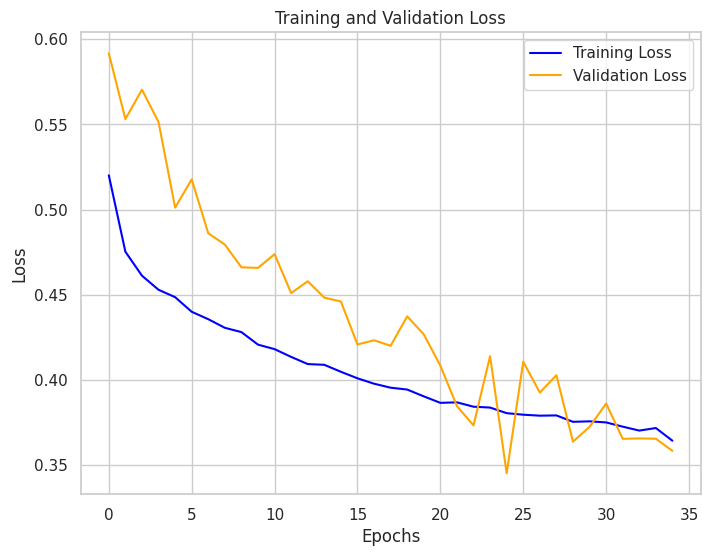

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

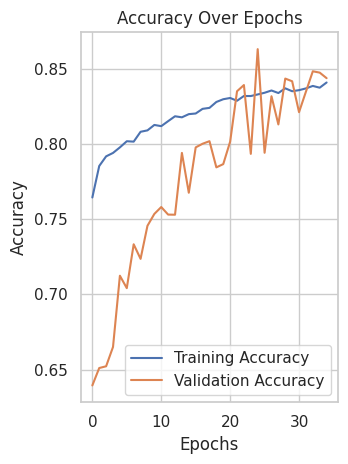

In [ ]:
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions
nn_predictions = nn_model.predict(X_test)
nn_predictions = (nn_predictions > 0.5).astype(int)  # Convert probabilities to binary

# Evaluate the model
print("\nNeural Network Performance:")
print(f"Accuracy: {accuracy_score(y_test, nn_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, nn_predictions))

# Calculate and print the ROC-AUC score
if len(set(y_test)) > 1:  # Ensure both classes are present in the test set
    roc_auc = roc_auc_score(y_test, nn_predictions)
    print(f"ROC-AUC: {roc_auc:.2f}")
else:
    print("ROC-AUC cannot be calculated as one class is missing in the test set.")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_predictions))



247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Neural Network Performance:
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      6960
           1       0.33      0.49      0.40       920

    accuracy                           0.83      7880
   macro avg       0.63      0.68      0.65      7880
weighted avg       0.86      0.83      0.84      7880

ROC-AUC: 0.68

Confusion Matrix:
[[6052  908]
 [ 465  455]]
